# 效率

## 准备

In [1]:
TFile *ipf = new TFile("../data/tracking.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCut c2nCut = "c2nx < 10 && c2ny < 10";
TCanvas *c1 = new TCanvas;

## 束流打在靶范围内的比例


**靶的面积需要从图里看，不要一下子套公式**

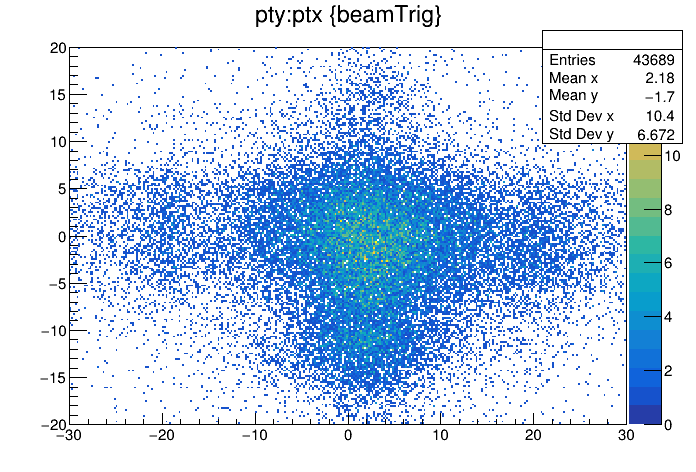

In [2]:
tree->Draw("pty:ptx>>(300, -30, 30, 200, -20, 20)", "beamTrig", "colz");
c1->Draw();

从图里看，x方向宽30，y方向高16为有效面积

In [3]:
Double_t totalParticles = tree->GetEntries(c2nCut && "beamTrig");
Double_t targetParticles = tree->GetEntries(c2nCut && "beamTrig && abs(ptx) < 15 && abs(pty) < 8");
cout << "target / total = " << targetParticles << " / " << totalParticles << " = " << targetParticles/totalParticles * 100.0 << "%" << endl;

target / total = 23559 / 38880 = 60.5941%


## PPAC1a的效率

### 穿过探测器灵敏面积的粒子

In [4]:
TCut pass0Cut = "abs(fxx[0]) < 120 && abs(fyy[0]) < 75" && c2nCut;
Double_t pass0N = tree->GetEntries(pass0Cut);
cout << pass0N << endl;

566983



### 使用阳极计算

In [5]:
TCut anode0Cut = "abs(anode[0]) < 150";
TCut x0Cut = "trackX & 0x1";
TCut y0Cut = "trackY & 0x1";
Double_t anode0N = tree->GetEntries(pass0Cut && anode0Cut);
Double_t x0N = tree->GetEntries(pass0Cut && anode0Cut && x0Cut);
Double_t y0N = tree->GetEntries(pass0Cut && anode0Cut && y0Cut);
Double_t xy0N = tree->GetEntries(pass0Cut && anode0Cut && x0Cut && y0Cut);
printf(" eff-a   %.2f%%\n eff-ax  %.2f%%\n eff-ay  %.2f%%\n eff-axy %.2f%%\n", anode0N/pass0N*100, x0N/pass0N*100, y0N/pass0N*100, xy0N/pass0N*100);

 eff-a   99.18%
 eff-ax  94.33%
 eff-ay  91.73%
 eff-axy 86.89%


### 使用PPAC2计算

In [6]:
TCut track2Cut = "trackX & 0xc";
Double_t track2N = tree->GetEntries(pass0Cut && track2Cut);
Double_t x02N = tree->GetEntries(pass0Cut && track2Cut && x0Cut);
Double_t y02N = tree->GetEntries(pass0Cut && track2Cut && y0Cut);
Double_t xy02N = tree->GetEntries(pass0Cut && track2Cut && x0Cut && y0Cut);
printf(" eff-x  %.2f%%\n eff-y  %.2f%%\n eff-xy %.2f%%\n", x02N/track2N*100, y02N/track2N*100, xy02N/track2N*100);

 eff-x  94.41%
 eff-y  91.82%
 eff-xy 86.96%


两种计算方式得到的效率相差不大

 ## PPAC3的效率
 
 ### 穿过探测器灵敏面积的粒子数

In [7]:
TCut pass4Cut = "abs(fxx[4]) < 50 && abs(fyy[0]) < 50" && c2nCut;
Double_t pass4N = tree->GetEntries(pass4Cut);
cout << pass4N << endl;

524912



### 使用阳极计算

In [8]:
TCut anode4Cut = "abs(anode[4]) < 150";
TCut x4Cut = "trackX & 0x10";
TCut y4Cut = "trackY & 0x10";
Double_t anode4N = tree->GetEntries(pass4Cut && anode4Cut);
Double_t x4N = tree->GetEntries(pass4Cut && anode4Cut && x4Cut);
Double_t y4N = tree->GetEntries(pass4Cut && anode4Cut && y4Cut);
Double_t xy4N = tree->GetEntries(pass4Cut && anode4Cut && x4Cut && y4Cut);
printf(" eff-a   %.2f%%\n eff-ax  %.2f%%\n eff-ay  %.2f%%\n eff-axy %.2f%%\n", anode4N/pass4N*100, x4N/pass4N*100, y4N/pass4N*100, xy4N/pass4N*100);

 eff-a   56.18%
 eff-ax  52.13%
 eff-ay  51.60%
 eff-axy 47.56%


### 使用PPAC2计算

In [9]:
TCut track2Cut = "trackX & 0xc";
Double_t track2N = tree->GetEntries(pass4Cut && track2Cut);
Double_t x42N = tree->GetEntries(pass4Cut && track2Cut && x4Cut);
Double_t y42N = tree->GetEntries(pass4Cut && track2Cut && y4Cut);
Double_t xy42N = tree->GetEntries(pass4Cut && track2Cut && x4Cut && y4Cut);
printf(" eff-x  %.2f%%\n eff-y  %.2f%%\n eff-xy %.2f%%\n", x42N/track2N*100, y42N/track2N*100, xy42N/track2N*100);

 eff-x  52.29%
 eff-y  51.76%
 eff-xy 47.68%


同样的，两种计算方式得到的效率相差不大